<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded.


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride.

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones
* Visualize results on a nice dashboard

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here:

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you:

### Clustering is your friend

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly`

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well.


### Start small grow big

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach.

## Deliverable 📬

To complete this project, your team should:

* Have a map with hot-zones using any python library (`plotly` or anything else).
* You should **at least** describe hot-zones per day of week.
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan.

Your maps should look something like this:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

# I/ Take a look at the database and import usuals librairies

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN , KMeans

from PIL import Image

### We choose to focus on the month of April 2014

In [5]:
df = pd.read_csv('/content/uber-raw-data-apr14.csv' , parse_dates=['Date/Time'])
print(df.shape)
df.head()

(564516, 4)


,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


# II/ Preprocessing database

In [6]:
# Creates time series features from datetime.
df = df.copy()
df['hour'] = df['Date/Time'].dt.hour
df['day_of_week'] = df['Date/Time'].dt.day_of_week
df['day_name'] = df['Date/Time'].dt.day_name()

df.head()

,Date/Time,Lat,Lon,Base,hour,day_of_week,day_name
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,1,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,1,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,1,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,1,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,1,Tuesday


### Print the unique values in every column in a pandas dataframe

In [7]:
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

Date/Time
['2014-04-01T00:11:00.000000000' '2014-04-01T00:17:00.000000000'
 '2014-04-01T00:21:00.000000000' ... '2014-04-24T03:08:00.000000000'
 '2014-04-24T03:11:00.000000000' '2014-04-30T02:55:00.000000000']


Lat
[40.769  40.7267 40.7316 ... 40.9639 40.9086 41.0989]


Lon
[-73.9549 -74.0345 -73.9873 ... -73.6038 -73.6334 -74.534 ]


Base
['B02512' 'B02598' 'B02617' 'B02682' 'B02764']


hour
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


day_of_week
[1 2 3 4 5 6 0]


day_name
['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']




<Axes: title={'center': 'Nb of pickup per day of the week'}, xlabel='day_name'>

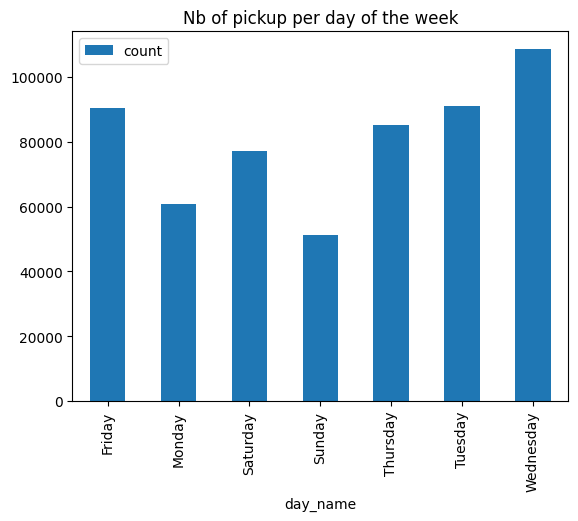

In [8]:

grouped_df = df.groupby('day_name').size().to_frame("count").reset_index()

grouped_df.plot(kind='bar', x='day_name', y='count', title='Nb of pickup per day of the week')


##### We see that the most pickup in a week is on Wednesday (i.e. when 'day' = 2 )

<Axes: title={'center': 'Nb of pickup per hour of the day'}, xlabel='hour'>

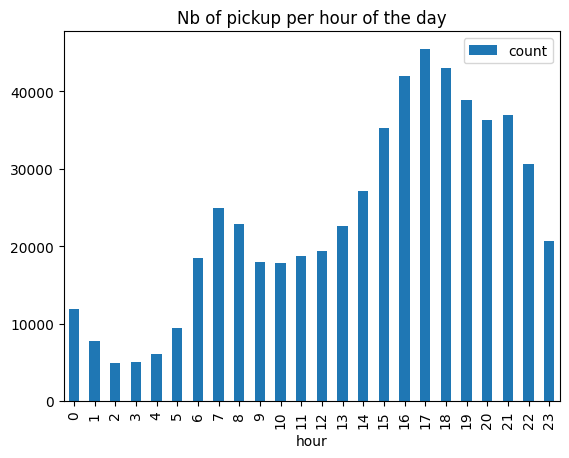

In [9]:
grouped_df_hour = df.groupby('hour').size().to_frame("count").reset_index()

grouped_df_hour.plot(kind='bar', x='hour', y='count', title='Nb of pickup per hour of the day')

##### We see that the most pickup in a day is at 17 p.m.

### Now, to reach clusters we will focus on the highest count of pickup during a week and during a day. So we have to filter our dataset with the features 'Day' equal 2 for Wednesday and 'Hour' equal 17.

In [10]:
columns_with_filter = df[(df['day_name'] == "Wednesday") & (df['hour'] == 17)][['Lat',	'Lon']]
train_df = columns_with_filter.copy()
train_df


,Lat,Lon
1836,40.7625,-73.9810
1837,40.7574,-73.9862
1838,40.7605,-73.9821
1839,40.7518,-73.9758
1840,40.7174,-74.0027
...,...,...
564281,40.7587,-73.9816
564282,40.7617,-73.9788
564283,40.7640,-73.9558
564284,40.7401,-74.0021


### We can see that features Lat & Lon are high. A good way is to standardize this ones and it will be helpful for clustering.

In [11]:
numeric_features = [0, 1]
numeric_transformer = StandardScaler()



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Preprocessings
print("Preprocessing sur le train set...")
print(df.head())
X = preprocessor.fit_transform(train_df)
print('...Terminé.')
print(X[0:5, :])
print()

Preprocessing sur le train set...
            Date/Time      Lat      Lon    Base  hour  day_of_week day_name
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512     0            1  Tuesday
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512     0            1  Tuesday
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512     0            1  Tuesday
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512     0            1  Tuesday
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512     0            1  Tuesday
...Terminé.
[[ 0.60069517 -0.00595534]
 [ 0.43467674 -0.13042207]
 [ 0.5355899  -0.03228484]
 [ 0.25238198  0.1185114 ]
 [-0.86742863 -0.5253646 ]]



### We are going to build our clusters, but to do so, we need to know the optimum number of clusters we need. First use the Elbow method to see if we can see how many we need to take as a value for k.

In [12]:
# Let's create a loop that will collect the Within-sum-of-square (wcss) for each value K
# Let's use .inertia_ parameter to get the within sum of square value for each value K
wcss =  []
k = []
for i in range (1,11):
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS for K=1 --> 18302.00000000002


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS for K=2 --> 13045.442075869472


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS for K=3 --> 8817.790806269471


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS for K=4 --> 6837.449405824647


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS for K=5 --> 5570.29703110394


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS for K=6 --> 4315.085510297817


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS for K=7 --> 3573.8276193010824


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS for K=8 --> 2925.713975721147


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS for K=9 --> 2535.224907438491


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS for K=10 --> 2226.8345788740057


In [13]:
# Let's visualize using plotly
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show() # if using workspace

### Then use the Silhouette method to see if we can refine our hypothesis for k.


In [14]:
# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels
for i in range (2,11):
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=2 is 0.7609088270521366


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=3 is 0.4675283045700459


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=4 is 0.5117960804452243


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=5 is 0.5131392266899214


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=6 is 0.4885885474936971


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=7 is 0.4897049073951566


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=8 is 0.4090345308046504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=9 is 0.4342382467702125


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=10 is 0.43858492496040685


In [15]:
# Create a data frame
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,
             x=k,
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show()

# KMeans

In [16]:
kmeans = KMeans(n_clusters = 3, random_state = 0)

print('Fitting Kmeans ...')
kmeans.fit(X)

Fitting Kmeans ...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=0)

In [17]:
kmeans_silhouette = silhouette_score(X , kmeans.labels_)

print('Silhouette score for Kmeans : ' , kmeans_silhouette)

Silhouette score for Kmeans :  0.4675283045700459


In [19]:
train_df["k_cluster"] = kmeans.labels_
train_df.head()

,Lat,Lon,k_cluster
1836,40.7625,-73.9810,0
1837,40.7574,-73.9862,0
1838,40.7605,-73.9821,0
1839,40.7518,-73.9758,0
1840,40.7174,-74.0027,1


In [21]:
fig = px.scatter_mapbox(
        train_df[train_df.k_cluster != -1],
        lat="Lat",
        lon="Lon",
        color="k_cluster",
        mapbox_style="carto-positron"
)

fig.show()

# DBSCAN

In [42]:
db = DBSCAN(metric='manhattan', eps=0.05 , min_samples=20)

print('Fitting DBSCAN ...')
db.fit(X)

db_silhouette = silhouette_score(X , db.labels_)
print('Silhouette score for DBSCAN : ' , db_silhouette)

Fitting DBSCAN ...
Silhouette score for DBSCAN :  -0.40558937516869376


In [43]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24])

In [44]:
train_df["db_cluster"] = db.labels_
train_df.head()

,Lat,Lon,k_cluster,db_cluster
1836,40.7625,-73.9810,0,0
1837,40.7574,-73.9862,0,0
1838,40.7605,-73.9821,0,0
1839,40.7518,-73.9758,0,0
1840,40.7174,-74.0027,1,0


In [45]:
fig = px.scatter_mapbox(
        train_df[train_df.db_cluster != -1],
        lat="Lat",
        lon="Lon",
        color="db_cluster",
        mapbox_style="carto-positron"
)

fig.show()

In [27]:
def hot_spots(df, day, hour):


    days = {"Monday" : 0,
        "Tuesday" : 1 ,
        "Wednesday" : 2,
        "Thursday" : 3,
        "Friday" : 4,
        "Saturday" : 5,
        "Sunday" : 6}

    day_ = days.get(day)
    name_of_day = day

    model = DBSCAN(eps=0.2 , min_samples=10 , n_jobs=-1)
    subset = df[(df['day_of_week'] == day_) & (df['hour'] == hour)][['Lat' , 'Lon']]
    to_plot = subset.copy(deep=True)

    subset[['Lat' , 'Lon']] = StandardScaler().fit_transform(subset[['Lat' , 'Lon']])

    model.fit(subset)
    labels = model.labels_
    subset['Cluster'] = labels
    to_plot['Cluster'] = labels


    centroids , size_ , clusters  = [] , [] , []
    for label in set(labels):
        if label != -1: # -1 is Noise
            coords = to_plot[to_plot['Cluster'] == label][['Lat',	'Lon']].values
            centroid = list(np.mean(coords, axis=0))
            centroids.append(centroid)
            size_.append(len(to_plot[labels == label]))
            clusters.append(label)

    centroid_df = pd.DataFrame({'Lat' : np.array(centroids)[: , 0]  , 'Lon' : np.array(centroids)[: , 1] , 'N_pick_ups' : size_,
                            'Cluster' : clusters , 'Point_size' : [2 for i in range(len(centroids))]})


    fig = px.scatter_mapbox(centroid_df, lat="Lat", lon="Lon", zoom = 10, # -1 is considered noise
                        color = 'Cluster', color_discrete_sequence = px.colors.sequential.Inferno, template='plotly',
                        mapbox_style='open-street-map',width = 1050, height = 900, size='Point_size',
                        title=f'Hot spots centroids for {name_of_day} at {hour} o clock',

                        hover_data = {'Lat' : False , "Lon" : False , "N_pick_ups" : True , "Point_size" : False},
                        )

    fig.show()


In [28]:
hot_spots(df,"Wednesday",17)